In [56]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model

In [57]:
dat = pd.read_csv("archive/data.csv")
dat_artist = pd.read_csv("archive/data_by_artist.csv")
dat_genres = pd.read_csv("archive/data_by_genres.csv")
dat_year = pd.read_csv("archive/data_by_year.csv")
dat_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [58]:
X = dat[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
y = dat["popularity"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_minmax, y_train)
preds = model.predict(X_test_minmax)

mean_squared_error(y_test, preds)

101.79043675570037

In [7]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
preds = model1.predict(X_test)

mean_squared_error(y_test, preds)

101.79043675571864

In [8]:
X_train["duration_ms"].iloc[0]

137872

In [9]:
X_train_minmax[0]

array([0.00108434, 0.21153846, 0.78      , 0.92929293, 0.        ,
       0.0253    , 0.09090909, 0.212     , 0.88881059, 1.        ,
       0.05289256, 0.42146986, 0.626     , 0.09090909, 1.        ,
       0.88881059, 0.        , 0.02459325])

In [10]:
model.score(X_test_minmax, y_test)

0.7819992419510093

In [11]:
model1.score(X_test, y_test)

0.7819992419509703

In [12]:
model2 = LinearRegression(normalize=True)
model2.fit(X_train, y_train)
preds = model2.predict(X_test)

mean_squared_error(y_test, preds)

101.79043675570028

In [13]:
model2.score(X_test, y_test)

0.7819992419510096

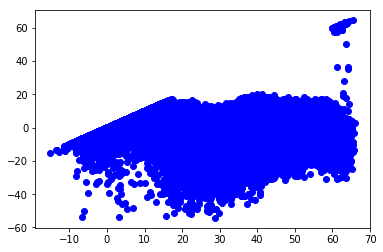

In [14]:
resid = preds - y_test
plt.plot(preds, resid, 'bo')

In [15]:
data = {"Actual Popularity": y_test, "Predicted": preds, "Residuals": preds-y_test}
data = pd.DataFrame(data=data)
data.head()

,Actual Popularity,Predicted,Residuals
132259,48,42.738071,-5.261929
17849,16,17.209593,1.209593
108334,2,0.616581,-1.383419
163389,13,14.493185,1.493185
157173,34,29.798056,-4.201944


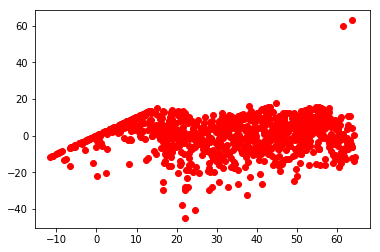

In [16]:
plt.plot(data.iloc[0:1000, 1], data.iloc[0:1000, 2], 'ro')

In [17]:
dat2 = data[np.abs(data["Residuals"]) > 30]
dat2.head()

,Actual Popularity,Predicted,Residuals
32231,2,61.674920,59.674920
82353,67,22.048058,-44.951942
24196,1,63.911032,62.911032
84157,70,37.686596,-32.313404
82264,59,21.362322,-37.637678


In [18]:
dat.loc[32231]

acousticness                          0.616
artists             ['Alejandro Fernández']
danceability                          0.535
duration_ms                          326840
energy                                0.327
explicit                                  0
id                   6vBgYbRLVm1zpPxSzeau8B
instrumentalness                          0
key                                       0
liveness                              0.107
loudness                            -10.192
mode                                      1
name                     Me Olvidé De Vivir
popularity                                2
release_date                     2020-06-05
speechiness                          0.0357
tempo                                 123.9
valence                               0.338
year                                   2020
Name: 32231, dtype: object

In [19]:
model2.coef_

array([-4.16896481e+00,  4.72605387e+00, -1.17604373e+00,  6.84203301e-01,
        2.42174025e-01, -2.46761469e+00, -5.95000750e-03, -2.44652417e+00,
        1.56654521e-02, -1.26964489e-01, -7.67374515e+00,  5.34910801e-03,
       -3.68358570e-01, -5.95000750e-03, -1.26964489e-01,  1.56654521e-02,
        2.42174025e-01,  1.61338939e-07])

In [20]:
X.columns

Index(['acousticness', 'danceability', 'energy', 'year', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'key', 'mode', 'loudness',
       'explicit', 'duration_ms'],
      dtype='object')

In [22]:
# Ridge Regression CV
reg = linear_model.RidgeCV(alphas=np.logspace(-9, 9, 19))
reg.fit(X_train, y_train)
reg.alpha_

1.0

In [25]:
reg.score(X_test, y_test)

0.7784127347771947

In [31]:
reg = linear_model.LassoCV(cv=5,alphas=np.logspace(-6, 6, 13), max_iter=1000000).fit(X_train, y_train)
reg.alpha_

1e-06

In [32]:
reg.score(X_test, y_test)

0.7819992423268884

In [36]:
regr = linear_model.ElasticNetCV(cv=5, random_state=0, alphas=np.logspace(-6,6,13), max_iter=10000000, l1_ratio=[.1, .2, .3, .4, .5, .6, .7, .8, .9])
regr.fit(X_train, y_train)
regr.alpha_

1e-05

In [37]:
regr.l1_ratio_

0.1

In [38]:
regr.score(X_test, y_test)

0.7819991423662846

In [39]:
from sklearn.linear_model import LogisticRegression

In [41]:
dat = pd.DataFrame(columns=["Regularization Parameter Lambda", "L1 or L2", "Accuracy"])
l = 0
    # Get intitial vocabulary
for i in np.logspace(-6,6,13):
    modell1 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty="l1", tol=0.015)
    modell1.fit(X_train, y_train)
    dat.loc[l] = [(1/i), "l1", model1.score(X_test, y_test)]
    l+=1
    
    modell2 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty="l2", tol=0.015)
    modell2.fit(X_train, y_train)        
    dat.loc[l] = [(1/i), "l2", model2.score(X_test, y_test)]
    l+=1

In [42]:
dat

,Regularization Parameter Lambda,L1 or L2,Accuracy
0,1000000.000000,l1,0.781999
1,1000000.000000,l2,0.781999
2,100000.000000,l1,0.781999
3,100000.000000,l2,0.781999
4,10000.000000,l1,0.781999
5,10000.000000,l2,0.781999
6,1000.000000,l1,0.781999
7,1000.000000,l2,0.781999
8,100.000000,l1,0.781999
9,100.000000,l2,0.781999


In [44]:
model2.predict(X_test)

array([42.73807068, 17.20959257,  0.61658123, ..., 11.65688447,
        8.78991614, 45.29163227])

In [46]:
np.mean(y_train)

31.557019576684542

In [47]:
max(y_train)

100

In [60]:
# Do Logistic Regression for > 50
y_train = [1 if i > 50 else 0 for i in y_train]
y_test = [1 if i > 50 else 0 for i in y_test]

In [64]:
from sklearn.metrics import accuracy_score
dat = pd.DataFrame(columns=["Regularization Parameter Lambda", "L1 or L2", "Accuracy"])
l = 0
    # Get intitial vocabulary
for i in np.logspace(-6,6,13):
    modell1 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty="l1", tol=0.015)
    modell1.fit(X_train, y_train)
    preds = modell1.predict(X_test)
    dat.loc[l] = [(1/i), "l1", accuracy_score(y_test, preds)]
    l+=1
    
    modell2 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty="l2", tol=0.015)
    modell2.fit(X_train, y_train)
    preds = modell2.predict(X_test)
    dat.loc[l] = [(1/i), "l2", accuracy_score(y_test, preds)]
    l+=1

In [66]:
dat.head()

,Regularization Parameter Lambda,L1 or L2,Accuracy
0,1000000.0,l1,0.789124
1,1000000.0,l2,0.789124
2,100000.0,l1,0.789124
3,100000.0,l2,0.789124
4,10000.0,l1,0.789565


In [68]:
# Can predict if > 50 with 80% accuracy
dat[dat["Accuracy"] == max(dat["Accuracy"])]

,Regularization Parameter Lambda,L1 or L2,Accuracy
10,10.0,l1,0.814343
